<a href="https://colab.research.google.com/github/ShahdTarek/Students-Performance-Prediction/blob/main/Students_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # library contain mathematic functions
import pandas as pd # data manipulation
import seaborn as sns # data Visualization
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = pd.read_csv("/content/X_train.csv")
X_test = pd.read_csv("/content/X_test.csv")
Y_train = pd.read_csv("/content/y_train.csv")
Y_test = pd.read_csv("/content/y_test.csv")

In [ ]:
X_train.head()


,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,...,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,yes,4,5,4,1,1,4,0,5,0


In [ ]:
Y_train.sample()

,StudentID,G3
488,1247,9


In [ ]:
print( X_train.isnull())
print( Y_train.isnull())

     StudentID  school    sex    age  address  famsize  Pstatus   Medu   Fedu  \
0        False   False  False  False    False    False    False  False  False   
1        False   False  False  False    False    False    False  False  False   
2        False   False  False  False    False    False    False  False  False   
3        False   False  False  False    False    False    False  False  False   
4        False   False  False  False    False    False    False  False  False   
..         ...     ...    ...    ...      ...      ...      ...    ...    ...   
673      False   False  False  False    False    False    False  False  False   
674      False   False  False  False    False    False    False  False  False   
675      False   False  False  False    False    False    False  False  False   
676      False   False  False  False    False    False    False  False  False   
677      False   False  False  False    False    False    False  False  False   

      Mjob  ...  romantic  

In [ ]:
print( X_train.info())
print( Y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [ ]:
X_train.corr()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
StudentID,1.000000,-0.025568,0.033835,0.008819,-0.015510,0.052696,-0.048207,0.013933,0.028179,-0.065217,-0.040965,-0.064961,-0.014153,-0.038585,0.062156,0.073663
age,-0.025568,1.000000,-0.132860,-0.140538,0.055174,-0.028041,0.259307,0.010495,0.032327,0.117159,0.109528,0.085824,-0.056425,0.132313,-0.106158,-0.109604
Medu,0.033835,-0.132860,1.000000,0.637230,-0.246363,0.081743,-0.189205,0.030544,-0.028747,-0.011983,-0.000146,-0.005991,-0.011018,0.079398,0.254589,0.253413
Fedu,0.008819,-0.140538,0.637230,1.000000,-0.198317,0.008896,-0.186079,0.012340,-0.059096,-0.001513,-0.001756,0.059653,0.070966,0.055754,0.208222,0.203855
traveltime,-0.015510,0.055174,-0.246363,-0.198317,1.000000,-0.093282,0.103983,0.001612,-0.009489,0.032579,0.107602,0.036317,-0.042143,-0.030064,-0.168338,-0.175014
studytime,0.052696,-0.028041,0.081743,0.008896,-0.093282,1.000000,-0.157755,0.041214,-0.124297,-0.071757,-0.170389,-0.223099,-0.039356,-0.099487,0.207787,0.177164
failures,-0.048207,0.259307,-0.189205,-0.186079,0.103983,-0.157755,1.000000,-0.077633,0.121088,0.065239,0.101502,0.093323,0.030420,0.078957,-0.374059,-0.369905
famrel,0.013933,0.010495,0.030544,0.012340,0.001612,0.041214,-0.077633,1.000000,0.098958,0.057628,-0.128756,-0.114175,0.106724,-0.050911,0.036475,0.034459
freetime,0.028179,0.032327,-0.028747,-0.059096,-0.009489,-0.124297,0.121088,0.098958,1.000000,0.297785,0.091823,0.096454,0.055953,-0.036030,-0.075963,-0.090693
goout,-0.065217,0.117159,-0.011983,-0.001513,0.032579,-0.071757,0.065239,0.057628,0.297785,1.000000,0.238133,0.359336,-0.009386,0.038353,-0.145594,-0.124717


In [ ]:
Grades = (X_train['G1'] + X_train['G2'] + Y_train['G3'])

In [ ]:
numerics = ['int16', 'int32', 'int64']
X_train = X_train.select_dtypes(include=numerics)

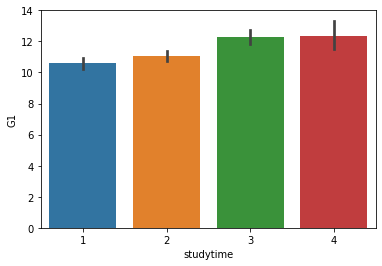

In [ ]:
sns.barplot(x='studytime',y='G1',data=X_train)

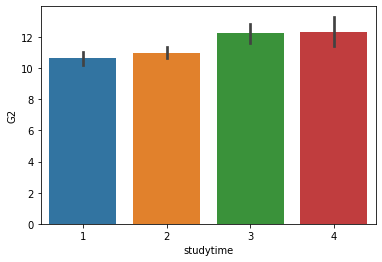

In [ ]:
sns.barplot(x='studytime',y='G2',data=X_train)

In [ ]:
#creating an object from LinearRegression() class named model
#.fit means we are fitting our data into the model and calculate optimal values where the line best fit the data
model = LinearRegression().fit(X_train, Grades)

In [ ]:
model.score(X_train, Grades)

0.9755729719253834

In [ ]:
numerics = ['int16', 'int32', 'int64']
X_test = X_test.select_dtypes(include=numerics)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[47.29272789 34.90119306 40.92353428 20.52468342 31.64231337 41.30262628
 55.76293963 38.06904804 40.15350515 34.07944606 32.21050468 25.61436603
 40.14199254 48.33160731 35.06749465 14.05534918 27.59317845 42.29342354
 31.11552733 24.42601903 31.81176435 23.92409972 44.17557678 35.37763698
 27.97474377 31.2289816  20.92449086 29.54053739 28.67841709 35.97608962
 23.04949585 38.3027256  41.05501098 43.23571671 15.26906136 27.15134772
 20.76724651 50.29421213 33.00101052 25.80819963 35.25784687 37.05440966
 36.24670969 39.27924305  3.78013042 31.12255446 41.31092301 28.33970132
 24.04468412 32.81559071 20.89354597 26.86080663 39.12906489 43.55825303
 27.41635471 28.69018502 42.90493893 21.88511004 55.20819963 50.65362562
 23.82010558 54.89051361 26.96958497 42.33276832 29.13988223 32.37186205
 31.35342213 37.97950499 34.45436591 45.46598723 25.76276148 27.02808374
 25.21089715 32.12115302 41.53705341 30.75781559 15.25266407 31.0036322
 25.65706401 31.79967136 40.3417633  35.32044609 37.